<a href="https://colab.research.google.com/github/TMhdSofyan/Unsupervised_Learning/blob/main/Data_Aufa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:

! pip install jcopml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 KB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.8 MB/s eta 0:00:00
  Created wheel for jcopml: filename=jcopml-1.2.2-py2.py3-none-any.whl size=32195 sha256=7857f3c23136330ad42550332ed59cda11da8f093600cd9a70bc8c0af4bf2666
  Stored in directory: /root/.cache/pip/wheels/ea/b3/7d/0a33c9f0e642e714df1e619df91370950750a14afea5705565
Successfully built jcopml


In [9]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

In [11]:

df = pd.read_csv('/content/drive/MyDrive/01_Project_Reservoir_Description/Data/01_DataAufa.csv', index_col= 'DEPT', sep = ';')
df.head()

,CALI,CGR,DTCRT,DTDRT,GR,NPHI,PEF,POSR,RD,RHOB,RMSF,RS,SP,VPVS,ZCORR,phi,k,phiz,RQI,FZI
DEPT,,,,,,,,,,,,,,,,,,,,
3634,8.629,43.132,160.046,530.801,79.166,0.474,3.763,0.450,0.746,2.092,0.261,0.527,57.342,3.303,-0.007,0.084,0.004,0.092,0.218,2.384
3650,8.603,37.810,160.976,475.242,67.620,0.413,4.131,0.436,1.061,1.901,0.290,0.797,51.919,2.958,-0.026,0.296,0.162,0.420,0.741,1.765
3660,8.580,21.390,154.607,379.996,60.378,0.384,5.482,0.401,1.579,1.902,0.307,1.289,53.667,2.461,-0.048,0.295,1.332,0.418,2.126,5.089
3670,8.584,14.696,151.267,326.013,52.714,0.355,5.364,0.362,1.849,1.975,0.344,1.541,48.629,2.151,-0.044,0.321,5.083,0.472,3.981,8.431
3680,8.580,16.101,153.177,316.764,47.434,0.356,5.602,0.348,1.749,1.949,0.342,1.465,45.622,2.070,-0.044,0.307,1.028,0.443,1.830,4.128


In [12]:
df = df.drop(columns = ['phi', 'k', 'phiz', 'RQI'])

In [13]:
df.head()

,CALI,CGR,DTCRT,DTDRT,GR,NPHI,PEF,POSR,RD,RHOB,RMSF,RS,SP,VPVS,ZCORR,FZI
DEPT,,,,,,,,,,,,,,,,
3634,8.629,43.132,160.046,530.801,79.166,0.474,3.763,0.450,0.746,2.092,0.261,0.527,57.342,3.303,-0.007,2.384
3650,8.603,37.810,160.976,475.242,67.620,0.413,4.131,0.436,1.061,1.901,0.290,0.797,51.919,2.958,-0.026,1.765
3660,8.580,21.390,154.607,379.996,60.378,0.384,5.482,0.401,1.579,1.902,0.307,1.289,53.667,2.461,-0.048,5.089
3670,8.584,14.696,151.267,326.013,52.714,0.355,5.364,0.362,1.849,1.975,0.344,1.541,48.629,2.151,-0.044,8.431
3680,8.580,16.101,153.177,316.764,47.434,0.356,5.602,0.348,1.749,1.949,0.342,1.465,45.622,2.070,-0.044,4.128


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 3634 to 4194
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CALI    48 non-null     float64
 1   CGR     48 non-null     float64
 2   DTCRT   48 non-null     float64
 3   DTDRT   48 non-null     float64
 4   GR      48 non-null     float64
 5   NPHI    48 non-null     float64
 6   PEF     48 non-null     float64
 7   POSR    48 non-null     float64
 8   RD      48 non-null     float64
 9   RHOB    48 non-null     float64
 10  RMSF    48 non-null     float64
 11  RS      48 non-null     float64
 12  SP      48 non-null     float64
 13  VPVS    48 non-null     float64
 14  ZCORR   48 non-null     float64
 15  FZI     48 non-null     float64
dtypes: float64(16)
memory usage: 6.4 KB


In [16]:
df.describe()

,CALI,CGR,DTCRT,DTDRT,GR,NPHI,PEF,POSR,RD,RHOB,RMSF,RS,SP,VPVS,ZCORR,FZI
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,8.620917,17.225604,130.710771,261.506979,54.029875,0.290125,5.722687,0.312250,4.054500,1.875542,0.407396,3.651417,35.344042,1.987896,-0.063500,9.761667
std,0.060253,7.522874,13.790453,64.214495,14.265218,0.085262,0.614747,0.056371,3.235439,0.170792,0.081839,3.068824,7.624639,0.325500,0.031238,10.595316
min,8.580000,7.624000,104.507000,206.489000,37.559000,0.141000,3.763000,0.212000,0.746000,1.586000,0.261000,0.527000,21.596000,1.654000,-0.142000,1.765000
25%,8.590750,13.056500,123.607500,218.934750,45.862250,0.234250,5.487250,0.262000,1.870750,1.757500,0.350500,1.522000,31.646750,1.761000,-0.088250,3.598250
50%,8.620500,15.737500,127.623500,246.339500,51.282500,0.285500,5.780500,0.299000,2.837500,1.881500,0.384500,2.413500,34.620000,1.868000,-0.062500,5.648500
75%,8.625000,18.838500,138.282250,281.500250,58.089750,0.354250,6.092250,0.350750,4.532250,1.969000,0.457500,3.975000,38.685500,2.085500,-0.040000,10.957500
max,9.005000,45.089000,160.976000,530.801000,122.374000,0.474000,7.013000,0.450000,13.040000,2.288000,0.643000,12.474000,57.342000,3.303000,-0.003000,48.870000


array([[<AxesSubplot:title={'center':'CALI'}>,
        <AxesSubplot:title={'center':'CGR'}>,
        <AxesSubplot:title={'center':'DTCRT'}>,
        <AxesSubplot:title={'center':'DTDRT'}>],
       [<AxesSubplot:title={'center':'GR'}>,
        <AxesSubplot:title={'center':'NPHI'}>,
        <AxesSubplot:title={'center':'PEF'}>,
        <AxesSubplot:title={'center':'POSR'}>],
       [<AxesSubplot:title={'center':'RD'}>,
        <AxesSubplot:title={'center':'RHOB'}>,
        <AxesSubplot:title={'center':'RMSF'}>,
        <AxesSubplot:title={'center':'RS'}>],
       [<AxesSubplot:title={'center':'SP'}>,
        <AxesSubplot:title={'center':'VPVS'}>,
        <AxesSubplot:title={'center':'ZCORR'}>,
        <AxesSubplot:title={'center':'FZI'}>]], dtype=object)

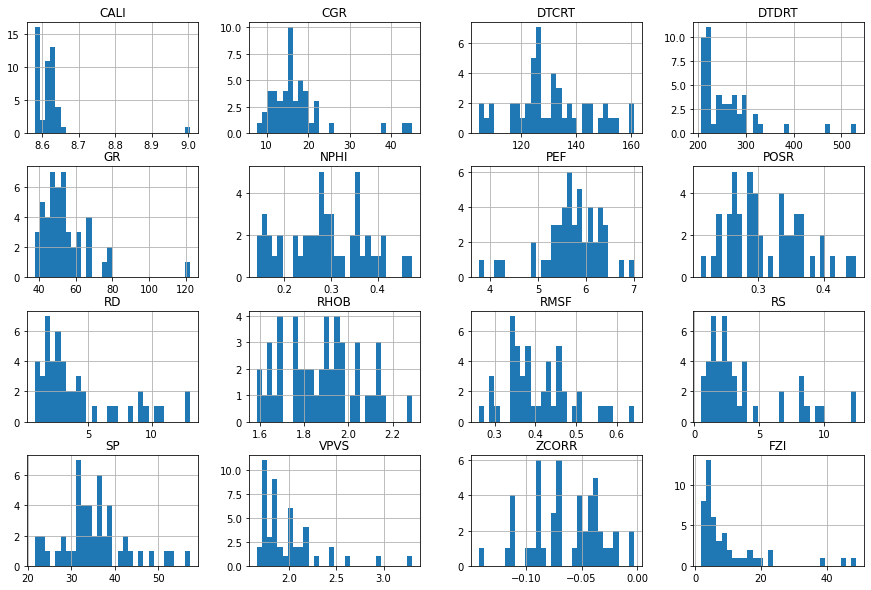

In [17]:

# more detailed look at the Univariate plots
df.hist(bins=30, figsize=(15,10))

<AxesSubplot:>

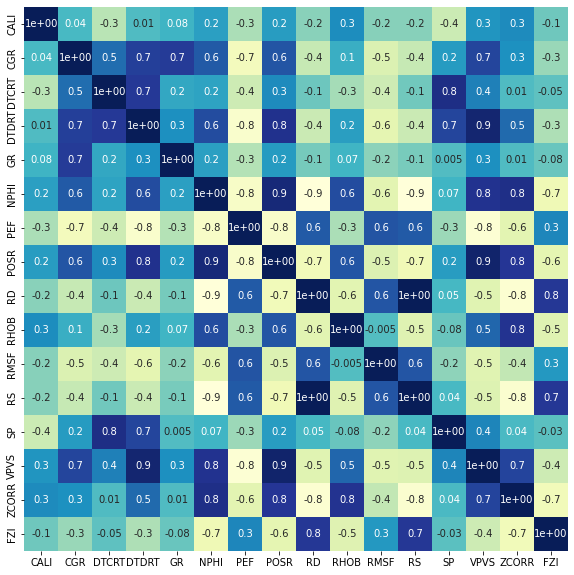

In [19]:

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), cmap= "YlGnBu", cbar= False, annot= True, square= True, fmt= '.1')

In [21]:
df.columns

Index(['CALI', 'CGR', 'DTCRT', 'DTDRT', 'GR', 'NPHI', 'PEF', 'POSR', 'RD',
       'RHOB', 'RMSF', 'RS', 'SP', 'VPVS', 'ZCORR', 'FZI'],
      dtype='object')

In [22]:
df = df.drop(columns = ['CALI', 'DTCRT', 'SP', 'GR' ])

<AxesSubplot:>

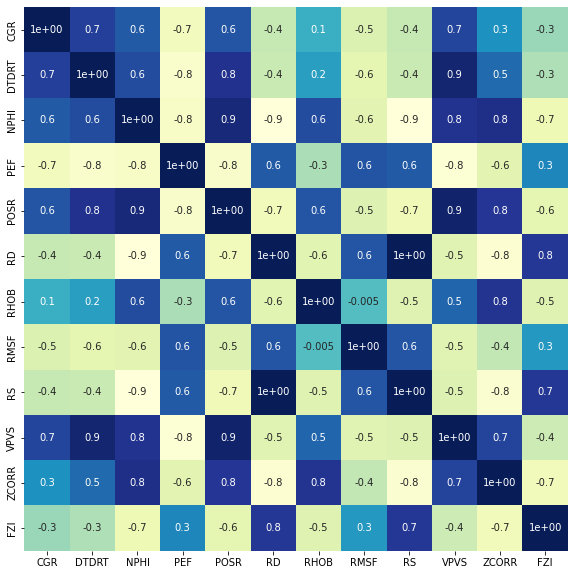

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), cmap= "YlGnBu", cbar= False, annot= True, square= True, fmt= '.1')

In [24]:
df = df.drop(columns = ['DTDRT', 'PEF' ])

<AxesSubplot:>

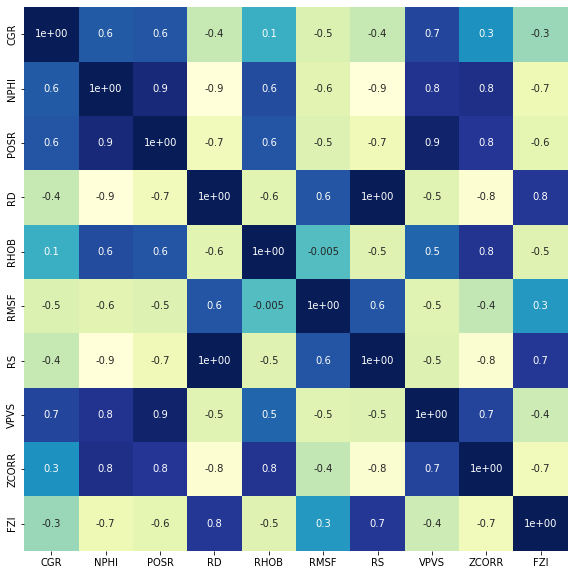

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), cmap= "YlGnBu", cbar= False, annot= True, square= True, fmt= '.1')

In [27]:
df = df.drop(columns = ['POSR', 'VPVS', 'ZCORR' ])

<AxesSubplot:>

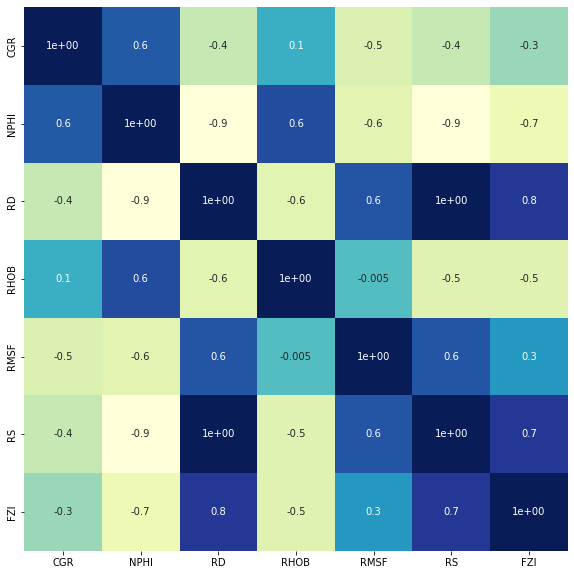

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), cmap= "YlGnBu", cbar= False, annot= True, square= True, fmt= '.1')

In [34]:

X = df.drop(columns="FZI")
y = df.FZI

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((28, 6), (20, 6), (28,), (20,))

In [35]:

from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gs
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [36]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling='minmax', transform= 'yeo-johnson', poly = 2), X.columns )])


from sklearn.ensemble import RandomForestRegressor
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestRegressor(n_jobs=-1, random_state=42))
])

model_RF = RandomizedSearchCV(pipeline, rsp.rf_params, cv=3, n_iter=50,  n_jobs=-1, verbose=1, random_state=42)
model_RF.fit(X_train, y_train)

print(model_RF.best_params_)
print(model_RF.score(X_train, y_train), model_RF.best_score_, model_RF.score(X_test, y_test))

/usr/local/lib/python3.8/dist-packages/jcopml/pipeline/_pipeline.py:66: UserWarning: Transformer has default standardization, so the scaling argument is neglected
  warn("Transformer has default standardization, so the scaling argument is neglected")


Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'algo__max_depth': 52, 'algo__max_features': 0.1572025152574213, 'algo__min_samples_leaf': 5, 'algo__n_estimators': 198}
0.634527123462309 0.4465074250746843 0.5237455060209937


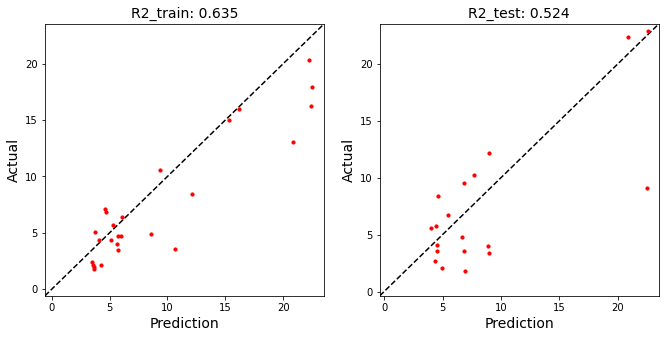

In [37]:
from jcopml.plot import plot_actual_vs_prediction, plot_residual
plot_actual_vs_prediction(X_train, y_train, X_test, y_test, model_RF)